<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/LLewis_GradientDescent_parametric_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-44-db13827887eb>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


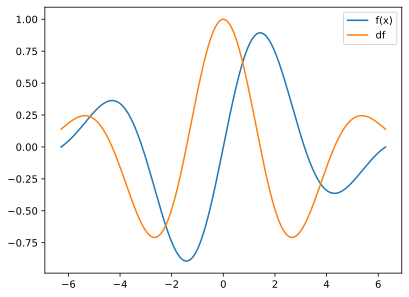

In [44]:
` #import necessary modules
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
#charts drawn in vector format instead of pixel format- looks better using svg
display.set_matplotlib_formats('svg')

# the function
x = np.linspace(-2*np.pi, 2*np.pi, 401)   #x axis range values: -6.28 through 6.28
fx = np.sin(x) * np.exp(-x**2*.05)   #function has a clear global min and local min
                                     #sin wave multiplied  by a galcion ?

# the function's derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin (x)*(-.1*x)*np.exp(-x**2*.05)

#quick plot for inspection
plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df'])

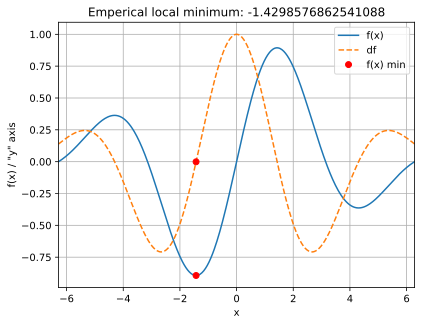

In [45]:
# the variable 'x' is the linspace defined for the x axis above
#Create function (NOTE: over-writing variable fx names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2* .05)

#create derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2* .05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

#random starting point or start value(s) choice() chooses one value from the x vector,
#localmin is an array that contains a range of 'x' values
localmin = np.random.choice(x, 1)  #example of array structure np.array([6])

#learning parameters
learning_rate= .01
training_epochs = 1000

#run through training using the gradient descent algorithm
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad   #to test gradient ascend grad*-1

#plot the results
#plot the function and the derivative of the function along the x axis
plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x) / "y" axis')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Emperical local minimum: %s' %localmin[0])
plt.show()



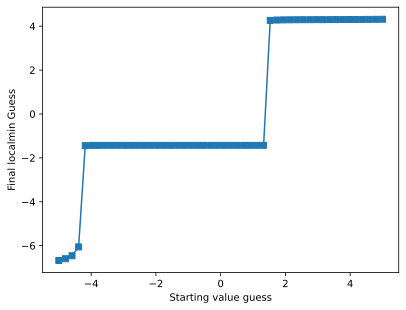

In [46]:
#Experiment 1:  Systematically varying the starting locations

startlocations = np.linspace(-5,5,50)
finalresults = np.zeros(len(startlocations))

#loop overt starting points
for idx, localmin in enumerate(startlocations):

  # run through training epochs
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

    #store the final guess
    finalresults[idx] = localmin

#plot the results
plt.plot(startlocations, finalresults, 's-')
plt.xlabel('Starting value guess')
plt.ylabel('Final localmin Guess')
plt.show()


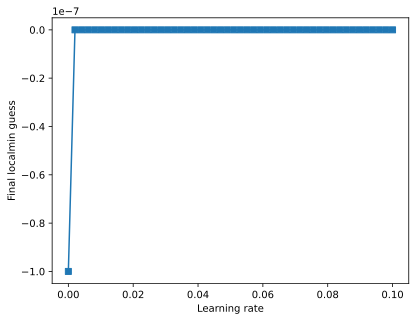

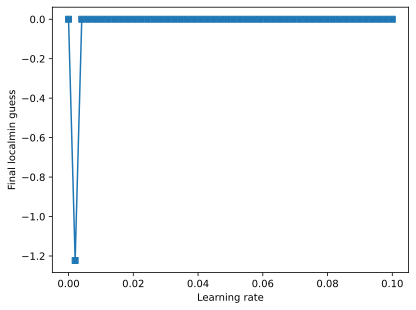

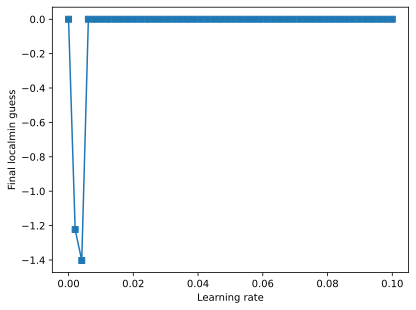

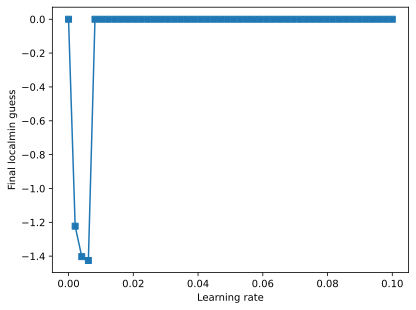

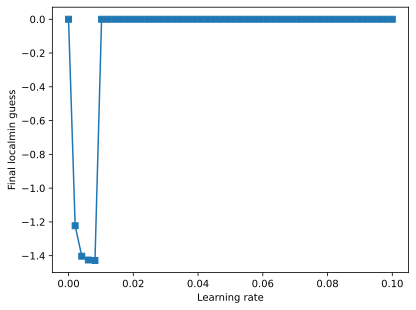

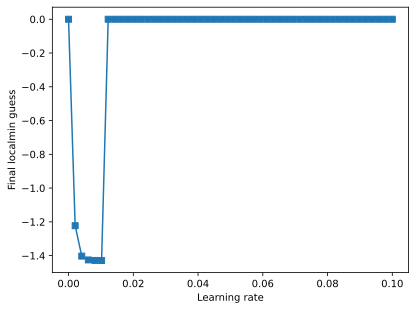

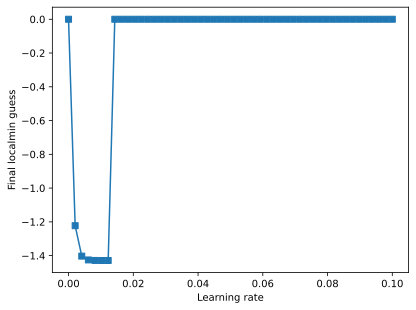

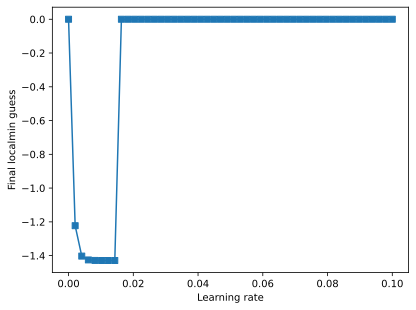

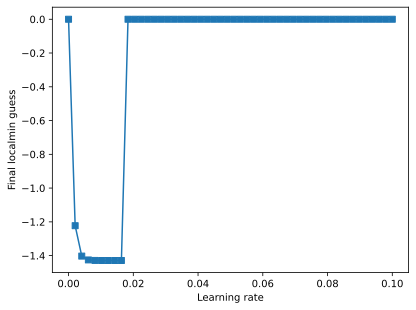

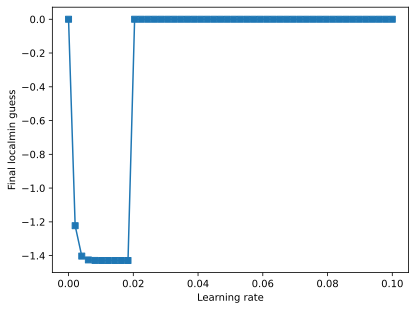

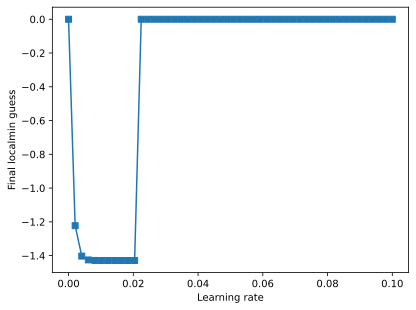

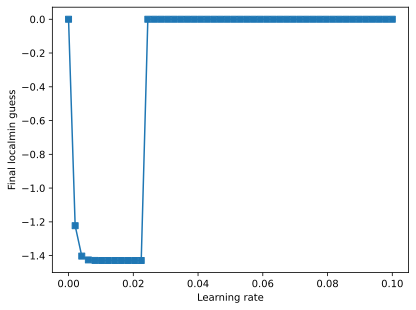

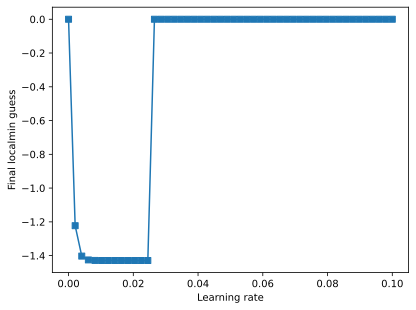

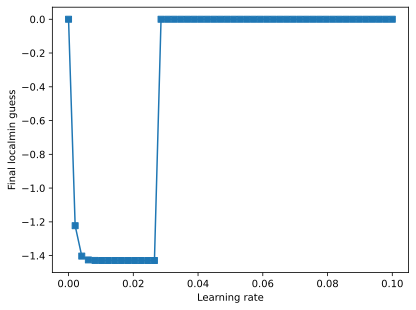

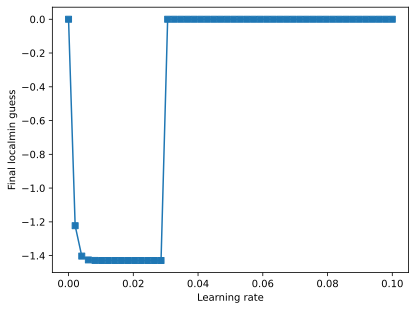

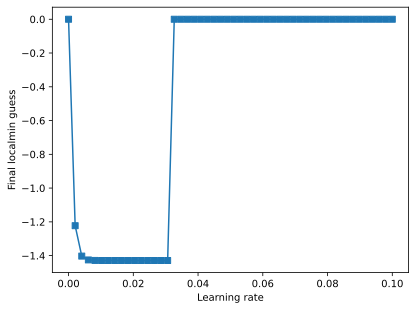

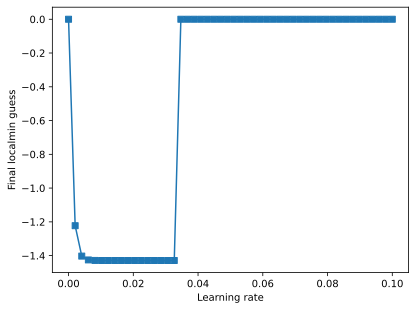

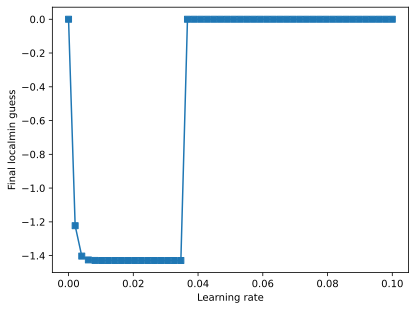

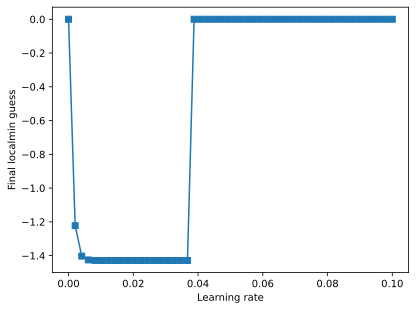

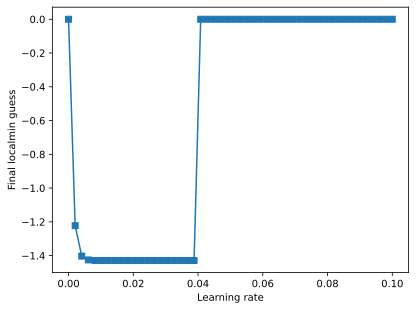

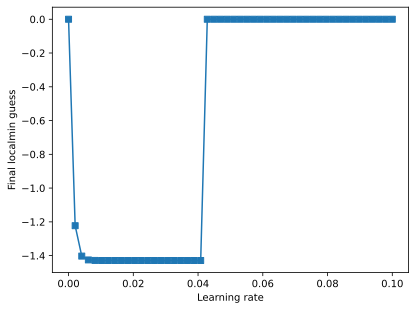

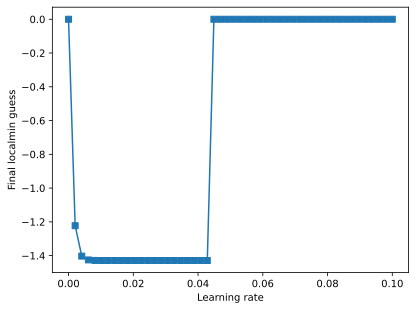

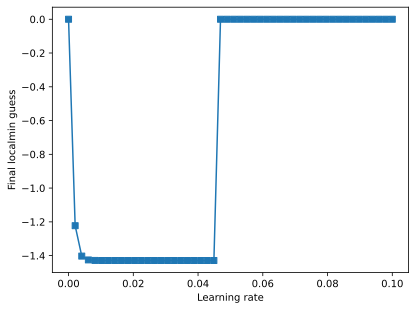

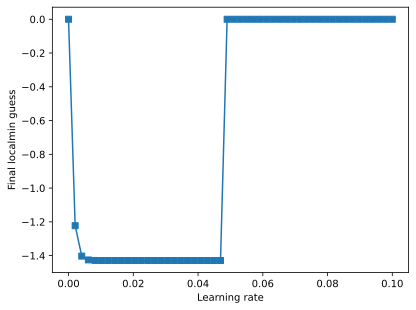

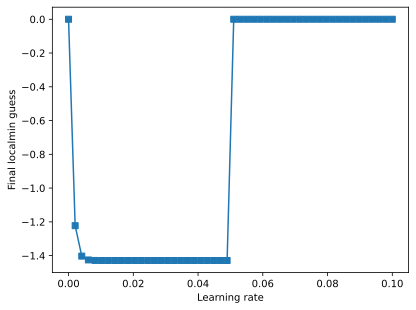

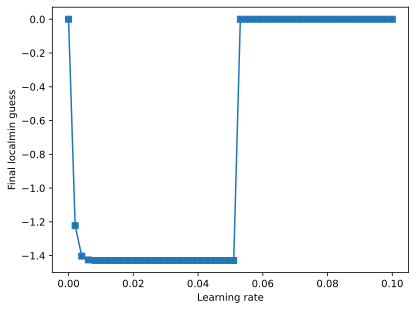

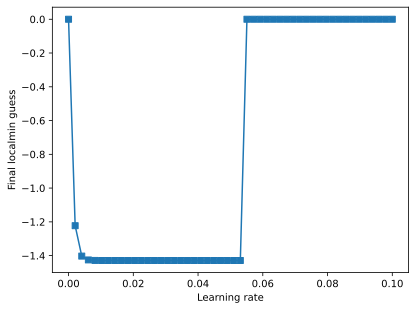

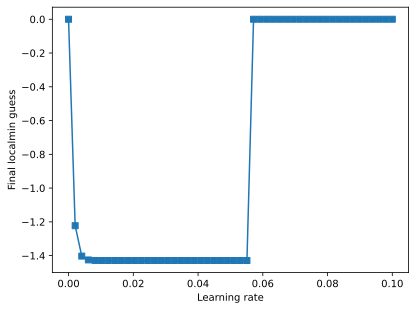

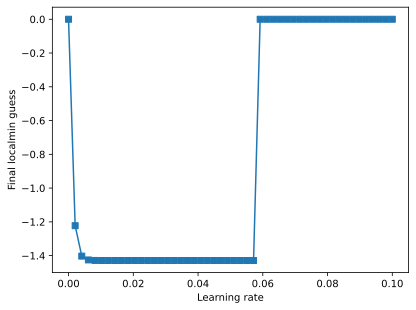

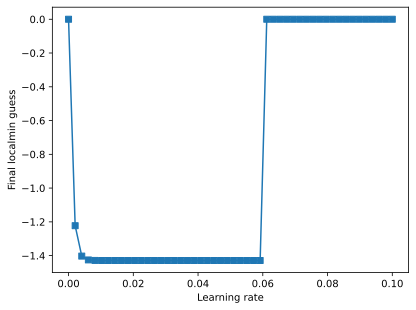

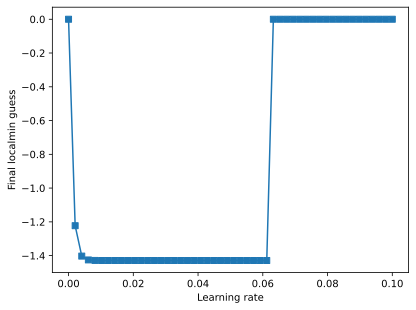

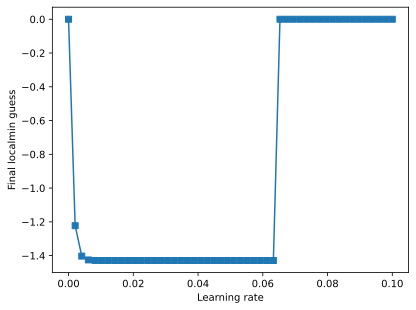

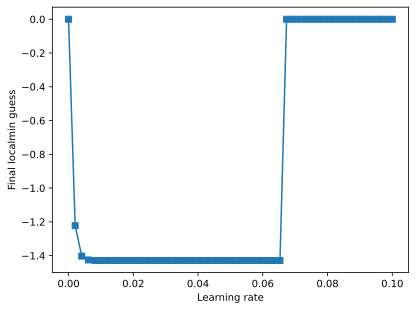

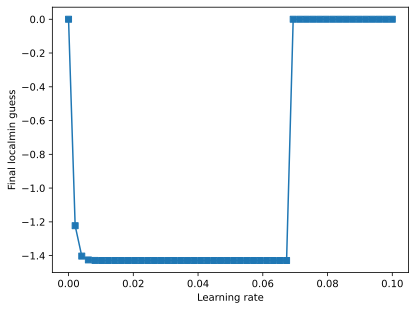

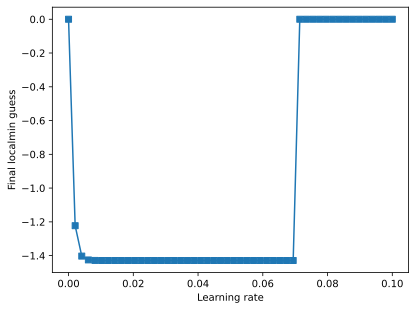

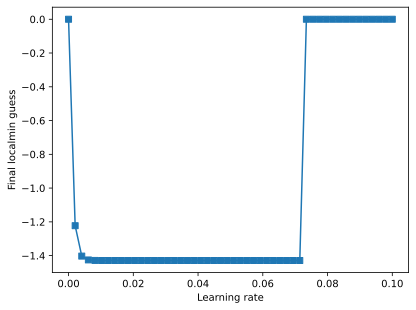

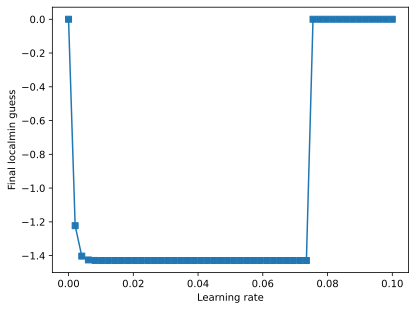

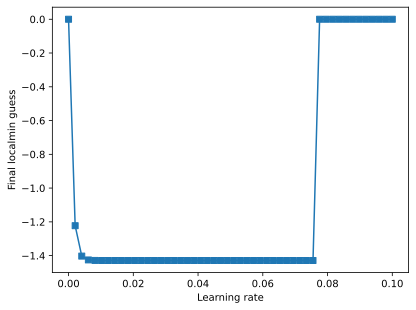

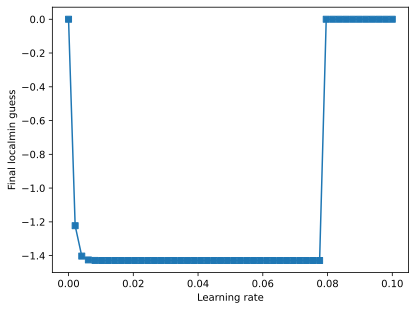

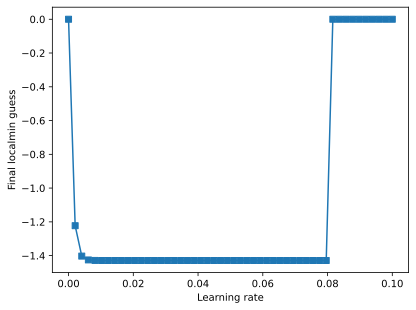

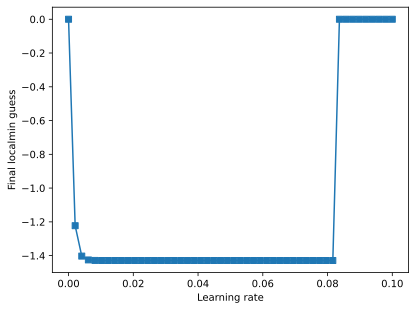

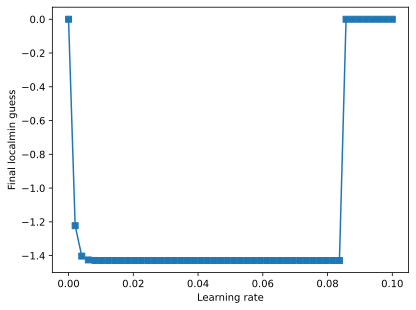

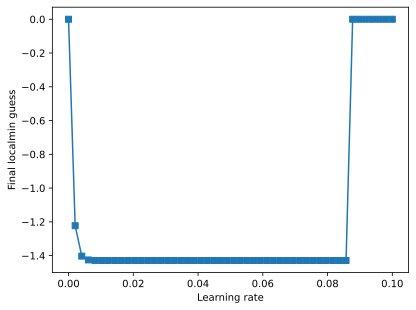

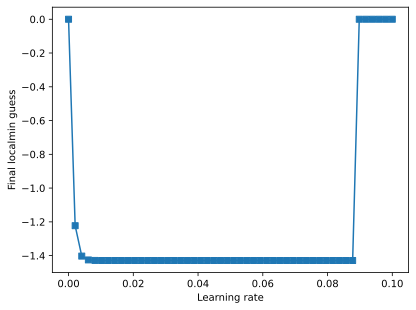

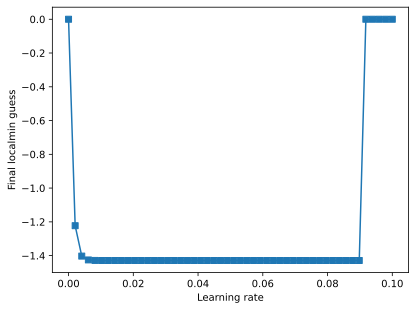

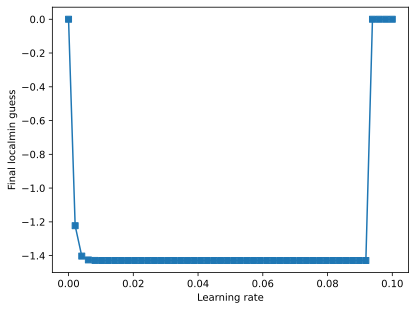

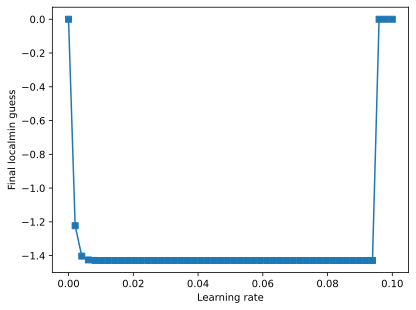

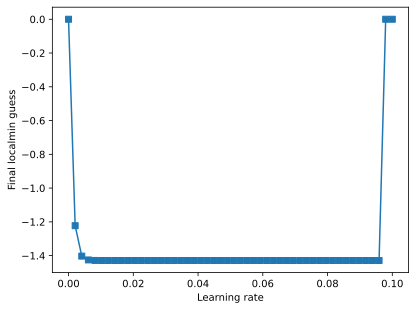

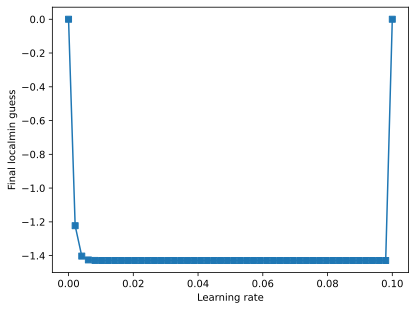

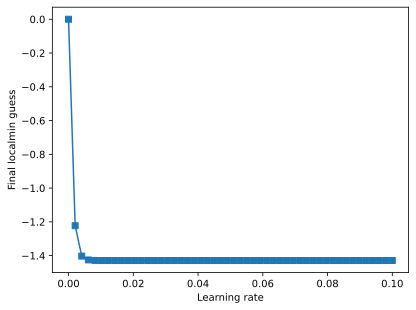

In [47]:
#Experiment 2: Systematically varying the learning rate
learningrates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learningrates))

#loop over learning rates
for idx, learningRate in enumerate(learningrates):

  #force starting guess to 0, why, a principle where we test the set localmin = 0, as we test, I can gradually in the value in small steps
  localmin = 0  #varying one single paramater localm

  #run through training epochs
  for i in range(training_epochs):
     grad = deriv(localmin)
     localmin = localmin - learningRate*grad


  # store the final localmin guess
  finalres[idx] = localmin


  #plot results
  plt.plot(learningrates, finalres, 's-')
  plt.xlabel('Learning rate')
  plt.ylabel('Final localmin guess')
  plt.show()


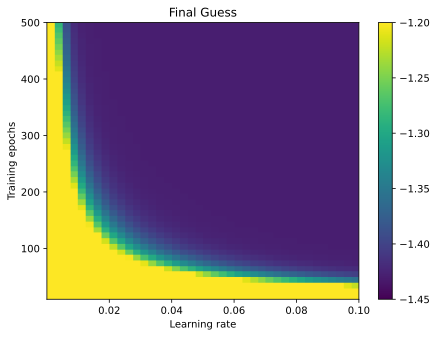

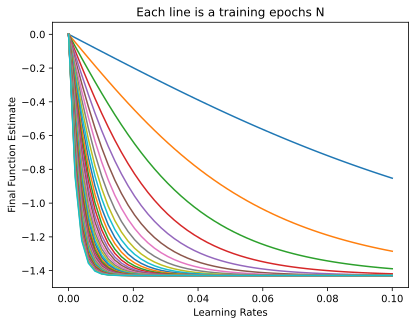

In [54]:
#Experiment 3: Interaction  between learning rate and training epochs

#setup paramaters, learningrates and training_epochs
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))  #start with 10 epochs up to 500 epochses in 40 steps

#initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

#loop over the learning rates
for  Lidx, learningRate in enumerate(learningrates):

  #run through training epochs again, fixing starting location
  for Eidx, trainEpochs in enumerate(training_epochs):

      localmin = -0
      for i in range(int(trainEpochs)):
        grad = deriv(localmin)
        localmin = localmin - learningRate*grad

      #store the final localmin guess
      finalres [Lidx, Eidx] = localmin


#plot the results
#plotting in a matrix
fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres, extent=[learningrates[0], learningrates[-1], training_epochs[0], training_epochs[-1]], aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()

#plot individual training epocs line
#another visualization
plt.plot(learningrates, finalres)
plt.xlabel('Learning Rates')
plt.ylabel('Final Function Estimate')
plt.title('Each line is a training epochs N')
plt.show()
